# TUTORIAL 1: INTRODUCTION TO PYTORCH

Tutorial by: 

Author: Phillip Lippe, 
https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.html

Full link: https://uvadlc-notebooks.rtfd.io/

## Setup

In [1]:
! pip install --quiet "pytorch-lightning" "urllib3" "torch" "lightning>=2.0.0" "setuptools>=68.0.0, <68.3.0"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [2]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm  # Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export

Numpy Quickstart: https://numpy.org/devdocs/user/quickstart.html

## The Basics of PyTorch

In [3]:
print("Using torch", torch.__version__)

Using torch 2.1.2


In [4]:
torch.manual_seed(42)  # Setting the seed

### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later). The name “tensor” is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

#### Initialization

In [5]:
x = Tensor(2, 3, 4)
print(x)

tensor([[[1.4013e-45, 3.3735e+27, 1.1727e-19, 1.2099e+25],
         [7.3697e+28, 7.5554e+28, 5.2839e-11, 5.5352e-11],
         [1.7540e+19, 1.0304e+21, 2.6373e+23, 1.3070e-14]],

        [[1.1708e-19, 1.3563e-19, 5.0746e+31, 4.2964e+24],
         [1.9049e+31, 1.7442e+28, 1.7033e+19, 1.6926e+22],
         [6.7722e+22, 6.6522e-33, 1.3563e-19, 6.7722e+22]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization:

`torch.zeros`: Creates a tensor filled with zeros

`torch.ones`: Creates a tensor filled with ones

`torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1

`torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1

`torch.arange`: Creates a tensor containing the values N,N+1,N+2,...,M

`torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [6]:
# Create a tensor from a (nested) list
x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [7]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [8]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor to Numpy, and Numpy to Tensor

`.numpy()` and `torch.from_numpy`

In [9]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [10]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`

#### Operations

Full list: https://pytorch.org/docs/stable/tensors.html#

In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [12]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

# Inline Operation
x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In-place operations are usually marked with a underscore postfix (for example `torch.add_` instead of `torch.add`).

In [13]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [14]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [15]:
x = x.permute(1, 0)  # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Matrix Multiplication:

`torch.mm`:  Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting; `a @ b` https://pytorch.org/docs/stable/generated/torch.mm.html#torch.mm

`torch.matmul`: Performs the matrix product over two matrices, but doesn’t support broadcasting https://pytorch.org/docs/stable/generated/torch.matmul.html#torch.matmul

`torch.bmm` : Performs the matrix product with a support batch dimension

`torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.

In [16]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [17]:
W = torch.arange(9).view(3, 3)  # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [18]:
h = torch.matmul(x, W)  # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexing

In [19]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [20]:
print(x[:, 1])  # Second column
print(x[0])  # First row
print(x[:2, -1])  # First two rows, last column
print(x[1:3, :])  # Middle two rows

tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Dynamic Computation Graph and Backpropagation
 PyTorch is a define-by-run framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

In [21]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [22]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [23]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)  # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [24]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


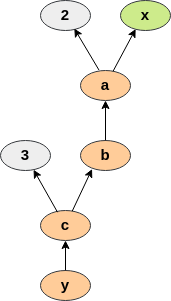

In [25]:
y.backward()

In [26]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


### GPU Support

In [27]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [28]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [29]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 1.04377s
GPU time: 0.09701s


When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don’t want that our code gives us a different output every time we run it on the exact same hardware.

In [30]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False